In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

In [3]:
tf.__version__

'2.2.0'

In [4]:
random.seed(42)

# version check

In [10]:
version = 'v1'

# label load

In [5]:
train_X = pd.read_excel('./data/paper_train.xlsx')
train_X = train_X.drop(['Unnamed: 0', 'abstract'], axis=1)
train_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
val_X = pd.read_excel('./data/paper_val.xlsx')
val_X = val_X.drop(['Unnamed: 0', 'abstract'], axis=1)
val_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
one_hot_train_labels = np.array(train_X)
one_hot_train_labels
print(one_hot_train_labels.shape)

one_hot_val_labels = np.array(val_X)
one_hot_val_labels
print(one_hot_val_labels.shape)

one_hot_test_labels = np.array(test_X)
one_hot_test_labels
print(one_hot_test_labels.shape)

(2805, 262)
(935, 262)
(935, 262)


# trained model load

In [11]:
encoder = load_model('./weights/residual_encoder_ls8_{}.h5'.format(version))
decoder = load_model('./weights/residual_decoder_ls8_{}.h5'.format(version))

C:\Users\user\.conda\envs\mlc\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


### train data

In [11]:
train_encode = encoder.predict(one_hot_train_labels)
train_encode

array([[7.3334866 , 4.69127   , 3.265415  , ..., 1.9827654 , 6.9661264 ,
        4.4188128 ],
       [1.0860976 , 3.5006466 , 1.5028049 , ..., 3.0451033 , 0.8549051 ,
        1.4862393 ],
       [5.653372  , 4.2576404 , 6.7671013 , ..., 1.0174375 , 5.5159574 ,
        8.011985  ],
       ...,
       [2.9350367 , 1.1601727 , 1.7000335 , ..., 1.1307819 , 2.1215827 ,
        0.45951688],
       [5.860332  , 2.6209433 , 3.0827994 , ..., 3.954953  , 4.618485  ,
        3.0308623 ],
       [5.742549  , 1.760525  , 0.6223401 , ..., 2.3360214 , 1.0568371 ,
        1.9639469 ]], dtype=float32)

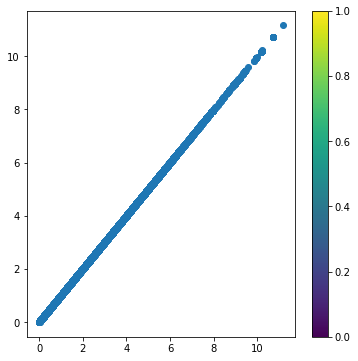

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(train_encode[:, :], train_encode[:, :])
plt.colorbar()
plt.show()

In [13]:
train_encode_df = pd.DataFrame(train_encode)
train_encode_df

,0,1,2,3,4,5,6,7
0,7.333487,4.691270,3.265415,6.099017,4.514557,1.982765,6.966126,4.418813
1,1.086098,3.500647,1.502805,1.056681,1.601599,3.045103,0.854905,1.486239
2,5.653372,4.257640,6.767101,1.588836,0.451401,1.017437,5.515957,8.011985
3,0.477079,0.577198,1.314709,0.626431,3.114538,1.916522,0.842937,1.427753
4,4.680254,2.319234,2.757001,4.627424,3.021222,2.567744,2.596895,6.932147
...,...,...,...,...,...,...,...,...
2800,4.334424,3.003032,5.494770,2.857428,7.230121,3.382930,1.779691,2.387172
2801,3.959833,0.649226,5.383966,0.079394,3.142159,2.114193,0.000000,3.232554
2802,2.935037,1.160173,1.700034,1.836972,2.797812,1.130782,2.121583,0.459517
2803,5.860332,2.620943,3.082799,4.582919,6.533776,3.954953,4.618485,3.030862


In [14]:
train_encode_df.to_excel('./rae_ls8_{}_latent_vector_train.xlsx'.format(version))

In [15]:
train_decode = decoder.predict(train_encode)
train_decode

array([[5.5276007e-17, 3.4915676e-08, 9.8925670e-20, ..., 4.4060222e-09,
        5.8274819e-22, 5.0635631e-11],
       [3.9853582e-08, 4.1790892e-05, 3.5907199e-06, ..., 1.3407910e-07,
        9.9325608e-15, 9.5072866e-04],
       [1.4506980e-20, 1.1476165e-16, 6.8641622e-25, ..., 4.3941684e-05,
        2.9990606e-26, 1.0591260e-18],
       ...,
       [7.4136317e-08, 7.4209402e-06, 3.6715750e-08, ..., 3.2092977e-04,
        1.3327165e-09, 4.0230015e-04],
       [2.5698227e-10, 2.3565930e-07, 5.4364171e-09, ..., 6.5947033e-11,
        1.4055242e-11, 2.0043453e-05],
       [2.6267269e-18, 8.9597961e-06, 8.8291893e-21, ..., 2.2973628e-12,
        3.9477107e-20, 1.9081158e-07]], dtype=float32)

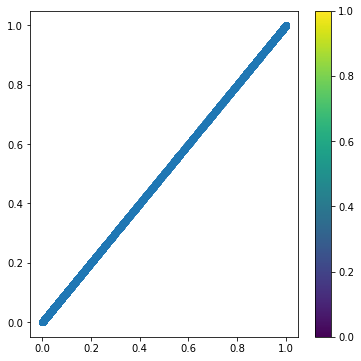

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(train_decode[:, :], train_decode[:, :])
plt.colorbar()
plt.show()

In [17]:
train_predict = train_decode.round()
train_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
"""train_predict = np.where(train_decode > 0.5, 1, 0)
train_predict"""

'train_predict = np.where(train_decode > 0.5, 1, 0)\ntrain_predict'

In [19]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [20]:
#c_matrix.shape

In [21]:
#c_matrix

In [22]:
print('accuracy : ', accuracy_score(one_hot_train_labels, train_predict))
print('precision : ', precision_score(one_hot_train_labels, train_predict, average='micro'))
print('recall : ', recall_score(one_hot_train_labels, train_predict, average='micro'))
print('f1 : ', f1_score(one_hot_train_labels, train_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_train_labels, train_predict))

accuracy :  0.7450980392156863
precision :  0.963837267704671
recall :  0.8032649644202595
f1 :  0.876255707762557
------------------------
hamming_loss :  0.0014750105455089738


In [23]:
train_predict_df = pd.DataFrame(train_predict)
train_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#train_predict_df.to_excel('./train_latent_vector.xlsx')

### validation data

In [25]:
val_encode = encoder.predict(one_hot_val_labels)
val_encode

array([[1.25066   , 0.70955527, 1.4838034 , ..., 0.38718253, 0.78577936,
        2.0621746 ],
       [0.8050625 , 0.8367303 , 0.        , ..., 0.79535174, 0.79052925,
        2.7444842 ],
       [0.93602115, 4.9327106 , 2.8689153 , ..., 3.006229  , 1.9495801 ,
        4.721739  ],
       ...,
       [3.2729454 , 1.1406751 , 2.1590853 , ..., 1.15166   , 0.40500635,
        0.48717862],
       [0.        , 2.0846071 , 0.9406029 , ..., 0.        , 3.55633   ,
        2.6796134 ],
       [0.4770795 , 0.57719755, 1.3147086 , ..., 1.9165221 , 0.84293675,
        1.4277525 ]], dtype=float32)

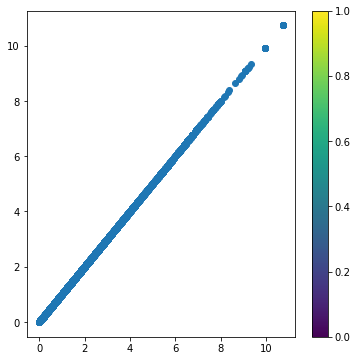

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(val_encode[:, :], val_encode[:, :])
plt.colorbar()
plt.show()

In [27]:
val_encode_df = pd.DataFrame(val_encode)
val_encode_df

,0,1,2,3,4,5,6,7
0,1.250660,0.709555,1.483803,0.396345,0.253100,0.387183,0.785779,2.062175
1,0.805062,0.836730,0.000000,2.037613,0.381523,0.795352,0.790529,2.744484
2,0.936021,4.932711,2.868915,3.416278,3.680028,3.006229,1.949580,4.721739
3,0.340400,1.234221,0.204817,1.627400,0.000000,0.000000,1.335595,2.241787
4,2.057830,0.735349,3.026100,0.000000,1.766952,1.725333,1.901590,2.605688
...,...,...,...,...,...,...,...,...
930,4.360698,6.401044,5.643868,3.718682,4.173103,3.778432,3.728020,6.083645
931,5.860333,2.620943,3.082799,4.582919,6.533776,3.954953,4.618485,3.030863
932,3.272945,1.140675,2.159085,2.541932,4.061028,1.151660,0.405006,0.487179
933,0.000000,2.084607,0.940603,2.523602,1.214156,0.000000,3.556330,2.679613


In [28]:
val_encode_df.to_excel('./rae_ls8_{}_latent_vector_val.xlsx'.format(version))

In [29]:
val_decode = decoder.predict(val_encode)
val_decode

array([[1.1363773e-06, 2.0500456e-04, 4.7550133e-09, ..., 1.7280484e-03,
        1.2234148e-07, 1.4714812e-05],
       [2.8518255e-07, 2.7269556e-03, 2.0500129e-11, ..., 1.2636618e-09,
        1.2970333e-09, 1.9623747e-04],
       [1.6369039e-09, 7.1481246e-08, 7.4418343e-09, ..., 1.5192703e-11,
        2.4604665e-18, 1.5326865e-03],
       ...,
       [5.8691523e-08, 3.0968468e-07, 1.0777895e-09, ..., 1.2983928e-05,
        1.2860930e-07, 1.8017842e-03],
       [2.0254174e-02, 2.7025264e-02, 3.4529944e-06, ..., 3.0518873e-03,
        3.9584865e-08, 5.7204266e-04],
       [4.9451720e-03, 2.5104603e-04, 9.3734252e-01, ..., 1.1789934e-08,
        2.4847100e-02, 2.5682546e-02]], dtype=float32)

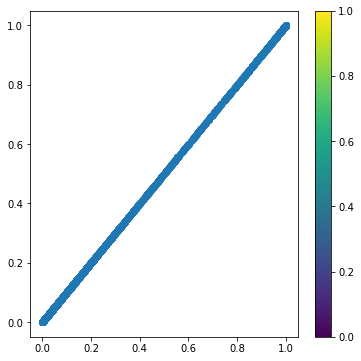

In [30]:
plt.figure(figsize=(6, 6))
plt.scatter(val_decode[:, :], val_decode[:, :])
plt.colorbar()
plt.show()

In [31]:
val_predict = val_decode.round()
val_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [32]:
"""val_predict = np.where(val_decode > 0.5, 1, 0)
val_predict"""

'val_predict = np.where(val_decode > 0.5, 1, 0)\nval_predict'

In [33]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [34]:
#c_matrix.shape

In [35]:
#c_matrix

In [36]:
print('accuracy : ', accuracy_score(one_hot_val_labels, val_predict))
print('precision : ', precision_score(one_hot_val_labels, val_predict, average='micro'))
print('recall : ', recall_score(one_hot_val_labels, val_predict, average='micro'))
print('f1 : ', f1_score(one_hot_val_labels, val_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_val_labels, val_predict))

accuracy :  0.6181818181818182
precision :  0.8785046728971962
recall :  0.6418373680943513
f1 :  0.7417503586800575
------------------------
hamming_loss :  0.002939135404335225


In [37]:
val_predict_df = pd.DataFrame(val_predict)
val_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#val_predict_df.to_excel('./val_latent_vector.xlsx')

### test data

In [12]:
test_encode = encoder.predict(one_hot_test_labels)
test_encode

array([[1.2815859 , 2.4420228 , 3.7308378 , ..., 3.650683  , 5.422423  ,
        4.1174645 ],
       [7.664857  , 3.560912  , 2.281829  , ..., 4.004691  , 3.9854114 ,
        3.9323962 ],
       [2.176334  , 1.2231145 , 1.4616878 , ..., 0.36999768, 0.84587383,
        2.4548516 ],
       ...,
       [1.7033721 , 1.0774786 , 1.4842596 , ..., 0.7069685 , 0.40364584,
        0.        ],
       [3.6067066 , 0.        , 2.454753  , ..., 3.355396  , 1.9359999 ,
        1.9690794 ],
       [5.8580823 , 2.169842  , 3.502044  , ..., 0.88398165, 5.1214833 ,
        4.3494773 ]], dtype=float32)

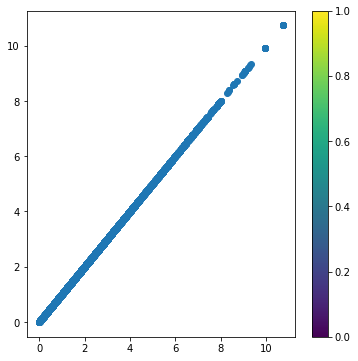

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(test_encode[:, :], test_encode[:, :])
plt.colorbar()
plt.show()

In [14]:
test_encode_df = pd.DataFrame(test_encode)
test_encode_df

,0,1,2,3,4,5,6,7
0,1.281586,2.442023,3.730838,0.814293,5.519815,3.650683,5.422423,4.117465
1,7.664857,3.560912,2.281829,2.851681,1.848323,4.004691,3.985411,3.932396
2,2.176334,1.223114,1.461688,1.342842,0.165859,0.369998,0.845874,2.454852
3,4.360698,6.401044,5.643868,3.718682,4.173102,3.778432,3.728020,6.083645
4,1.410720,3.552850,2.231976,2.541595,1.191471,0.692923,1.054690,2.742782
...,...,...,...,...,...,...,...,...
930,5.260635,0.516706,2.770712,1.144622,3.581216,3.329034,1.577148,0.897007
931,2.619767,2.009001,4.796967,0.790674,6.043745,4.819401,3.375310,3.800693
932,1.703372,1.077479,1.484260,0.313631,2.114560,0.706968,0.403646,0.000000
933,3.606707,0.000000,2.454753,1.230959,3.972774,3.355396,1.936000,1.969079


In [15]:
test_encode_df.to_excel('./rae_ls8_{}_latent_vector_test.xlsx'.format(version))

In [16]:
test_decode = decoder.predict(test_encode)
test_decode

array([[1.26163033e-03, 2.91199349e-08, 9.99748886e-01, ...,
        7.46206777e-11, 4.23781232e-09, 1.48065628e-05],
       [2.21170437e-20, 3.30760258e-06, 1.41645568e-19, ...,
        5.79672842e-15, 6.03532087e-25, 3.49725847e-12],
       [4.76808926e-10, 2.95517268e-04, 3.89725111e-15, ...,
        5.40764850e-05, 6.70238604e-12, 1.00782654e-06],
       ...,
       [3.44747314e-05, 1.91765175e-05, 1.75011286e-04, ...,
        1.93453016e-04, 4.64797665e-07, 5.93556883e-03],
       [1.40727463e-09, 2.97192013e-08, 5.36815904e-04, ...,
        1.25306761e-13, 1.33775901e-09, 5.47887453e-07],
       [8.79327600e-17, 1.20309585e-08, 1.04707483e-17, ...,
        1.22624231e-08, 9.40202545e-22, 1.51519337e-14]], dtype=float32)

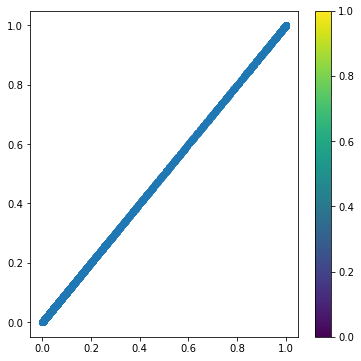

In [17]:
plt.figure(figsize=(6, 6))
plt.scatter(test_decode[:, :], test_decode[:, :])
plt.colorbar()
plt.show()

In [18]:
test_predict = test_decode.round()
test_predict

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
"""test_predict = np.where(test_decode > 0.5, 1, 0)
test_predict"""

'test_predict = np.where(test_decode > 0.5, 1, 0)\ntest_predict'

In [20]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [21]:
#c_matrix.shape

In [22]:
#c_matrix

In [23]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.6053475935828877
precision :  0.8754098360655738
recall :  0.6429861529199278
f1 :  0.7414092329052413
------------------------
hamming_loss :  0.0030411887169857535


In [24]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='samples'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='samples'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='samples'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.6053475935828877
precision :  0.8210160427807487
recall :  0.7360427807486631
f1 :  0.7598945914453936
------------------------
hamming_loss :  0.0030411887169857535


C:\Users\user\.conda\envs\mlc\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
test_predict_df = pd.DataFrame(test_predict)
test_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
931,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
#test_predict_df.to_excel('./test_latent_vector.xlsx')